STUDENT DEPRESSION ANALYSIS
---------------------------------------------------------

Name:Aiswarya Reghuraj Nair
----

Organization:Entri Elevate
---

Date:
----


-------------------

1.Overview of Problem Statement:
----------

2.Objective
-----

3.Data Description
------

Import Libraries
---

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from scipy.stats import zscore

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, roc_curve,roc_auc_score, auc
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import joblib

import warnings
warnings.filterwarnings('ignore')

4.Data Collection
----

Load the dataset
---

In [52]:
data=pd.read_csv("Student Depression Dataset_1.csv")

In [53]:
data.shape

(27174, 18)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27174 entries, 0 to 27173
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27174 non-null  int64  
 1   Gender                                 27174 non-null  object 
 2   Age                                    27174 non-null  int64  
 3   City                                   27174 non-null  object 
 4   Profession                             27174 non-null  object 
 5   Academic Pressure                      27174 non-null  int64  
 6   Work Pressure                          27174 non-null  int64  
 7   CGPA                                   27174 non-null  float64
 8   Study Satisfaction                     27174 non-null  int64  
 9   Job Satisfaction                       27174 non-null  int64  
 10  Sleep Duration                         27174 non-null  object 
 11  Di

In [55]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27171.000000,27174.000000
mean,68612.502834,25.827666,3.142857,0.000442,7.657992,2.943291,0.000699,7.153713,3.139229,0.585486
std,39590.229675,4.905863,1.380842,0.044577,1.470809,1.360817,0.044984,3.708348,1.437961,0.492647
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,34085.250000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,68877.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,103199.250000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,136990.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [56]:
data.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [57]:
#The code data.describe(include='object') is used to generate descriptive statistics of the columns in a DataFrame 
#that have a data type of 'object' (typically categorical variables like strings or dates).
data.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27174,27174,27174,27174,27174,27174,27174,27174
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15142,1537,27144,8075,10046,5910,17199,13995


 5.Data Preprocessing- Data Cleaning
 -----

In [58]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [59]:
imputer = SimpleImputer(strategy='mean')
data['Financial Stress'] = imputer.fit_transform(data[['Financial Stress']])

In [60]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [61]:
#Drop ID column
data.drop(['id'],inplace=True,axis=1)

In [62]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


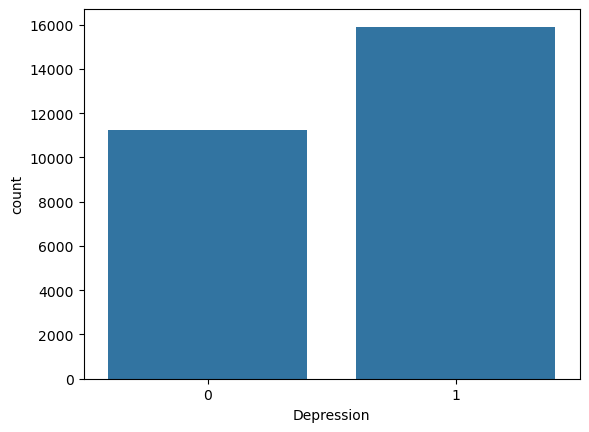

In [63]:
# Checking the distribution of customers on Revenue (Target column)
data_target = data['Depression'].copy()
data_target.value_counts()
# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)
plt.show()

In [64]:
numerical_columns = data.select_dtypes(include=['number'])

In [65]:
numerical_columns

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33,5,0,8.97,2,0,3,1.0,1
1,24,2,0,5.90,5,0,3,2.0,0
2,31,3,0,7.03,5,0,9,1.0,0
3,28,3,0,5.59,2,0,4,5.0,1
4,25,4,0,8.13,3,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...
27169,28,1,0,7.10,3,0,12,3.0,0
27170,28,5,0,8.69,5,0,4,4.0,0
27171,27,3,0,5.89,2,0,5,2.0,0
27172,31,3,0,9.79,3,0,2,2.0,0


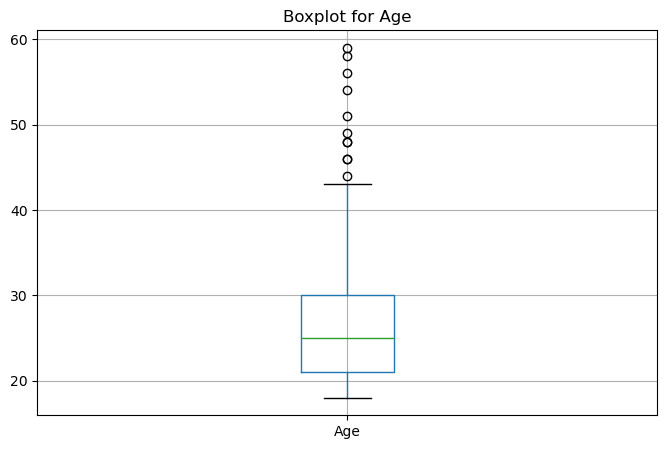

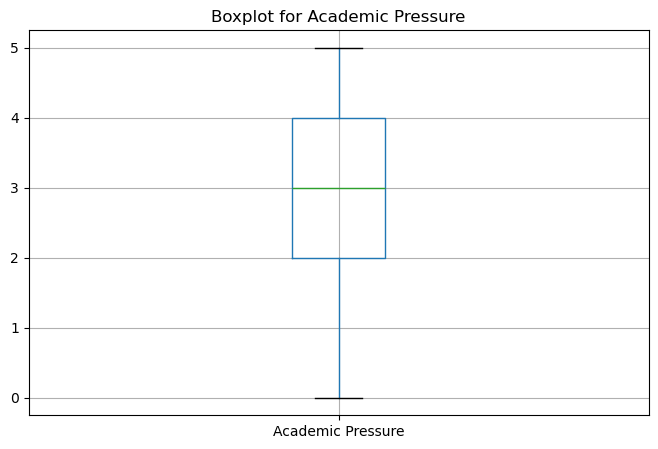

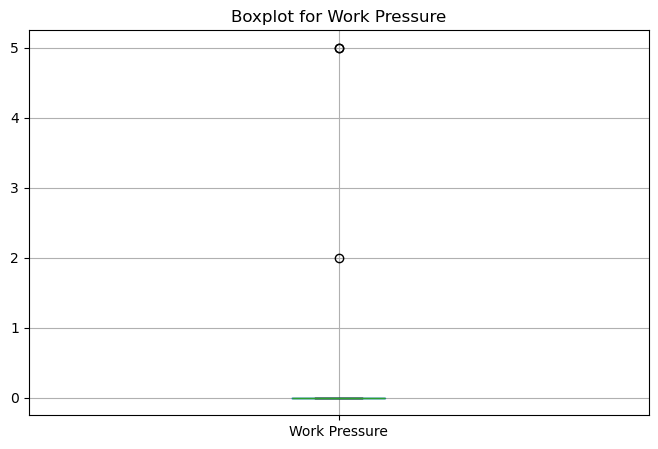

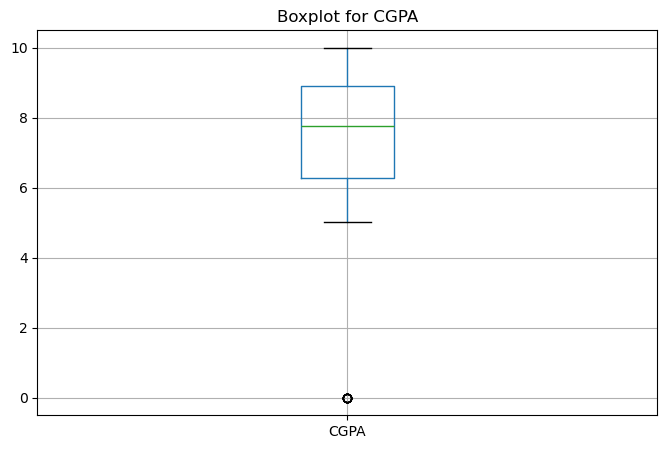

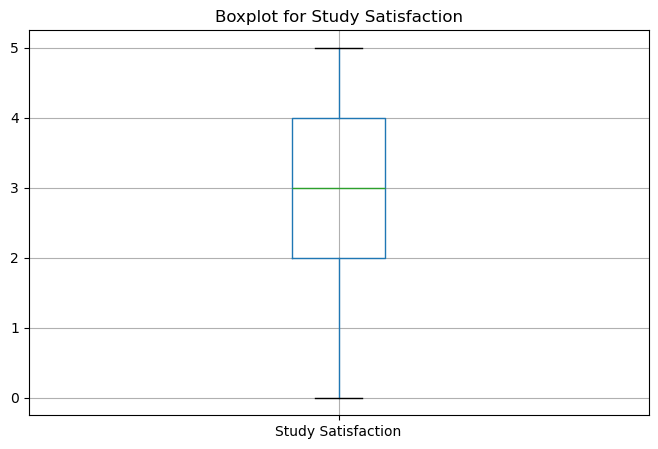

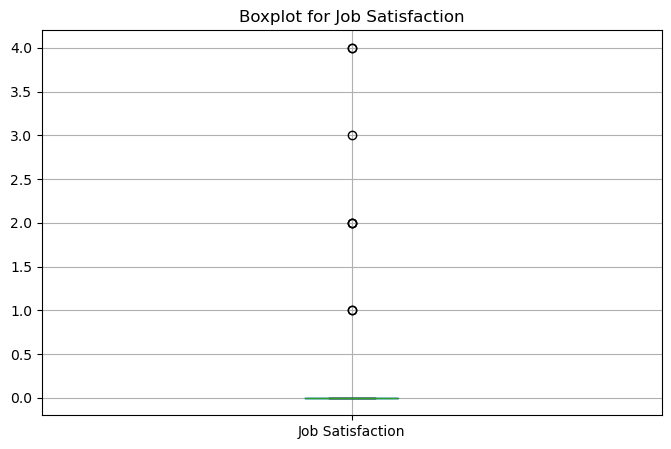

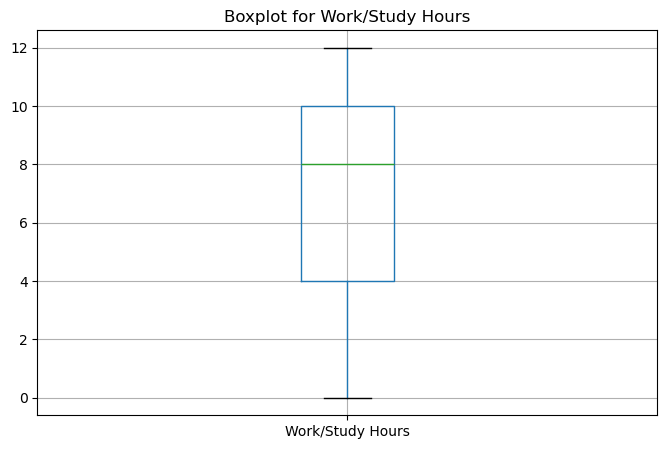

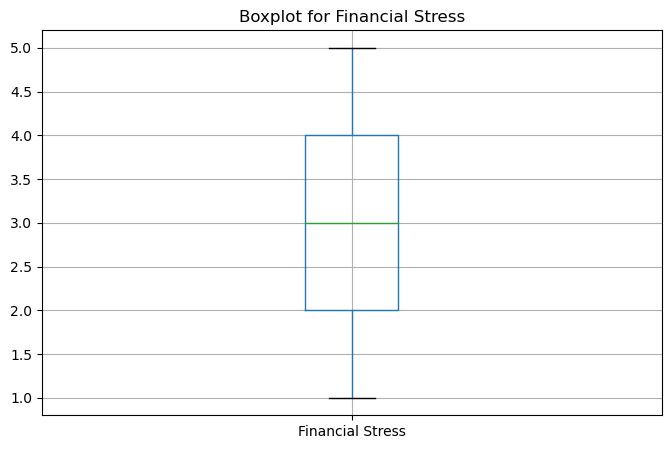

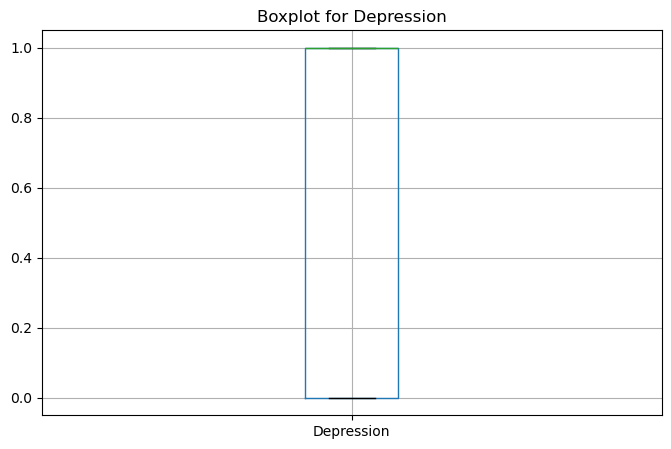

In [66]:
#Boxplot for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8,5))
    numerical_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

In [67]:
numerical_columns1 = data.select_dtypes(include=['number']).columns #due to error occuring in zscore 

In [68]:
numerical_columns1

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [69]:
# Calculate Z-scores to identify outliers
z_scores = np.abs(zscore(data[numerical_columns1]))
outlier_threshold = 3  # Common threshold for outlier detection
outlier_indices = np.where(z_scores > outlier_threshold)

In [70]:
# Drop rows with outliers
data_cleaned = data[(z_scores < outlier_threshold).all(axis=1)]
print("Cleaned Data:")
print(data_cleaned)

Cleaned Data:
       Gender  Age           City Profession  Academic Pressure  \
0        Male   33  Visakhapatnam    Student                  5   
1      Female   24      Bangalore    Student                  2   
2        Male   31       Srinagar    Student                  3   
3      Female   28       Varanasi    Student                  3   
4      Female   25         Jaipur    Student                  4   
...       ...  ...            ...        ...                ...   
27169  Female   28      Ghaziabad    Student                  1   
27170  Female   28       Srinagar    Student                  5   
27171    Male   27         Nashik    Student                  3   
27172    Male   31         Rajkot    Student                  3   
27173  Female   33         Jaipur    Student                  3   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                  0  8.97                   2                 0   
1                  0  5.90                   

In [71]:
data_cleaned.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [72]:
# Check skewness of numerical features
skewness = data[numerical_columns1].skew()
print("\nSkewness of Numerical Features:")
print(skewness)

# Apply log transformation to skewed features
for col in skewness.index:
    if abs(skewness[col]) > 1:  # Threshold for high skewness
        data[f'{col}_log'] = data[col].apply(lambda x: np.log1p(x) if x > 0 else 0)
        print(f"Log-transformed {col}")


Skewness of Numerical Features:
Age                     0.130907
Academic Pressure      -0.136796
Work Pressure         107.170023
CGPA                   -0.115985
Study Satisfaction      0.010933
Job Satisfaction       73.133408
Work/Study Hours       -0.454151
Financial Stress       -0.129969
Depression             -0.347074
dtype: float64
Log-transformed Work Pressure
Log-transformed Job Satisfaction


In [73]:
data_cleaned.shape, data_cleaned.isnull().sum()

((27145, 17),
 Gender                                   0
 Age                                      0
 City                                     0
 Profession                               0
 Academic Pressure                        0
 Work Pressure                            0
 CGPA                                     0
 Study Satisfaction                       0
 Job Satisfaction                         0
 Sleep Duration                           0
 Dietary Habits                           0
 Degree                                   0
 Have you ever had suicidal thoughts ?    0
 Work/Study Hours                         0
 Financial Stress                         0
 Family History of Mental Illness         0
 Depression                               0
 dtype: int64)

In [74]:
data_cleaned.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [75]:
#Original dataset had 27,901 rows; after outlier removal, it has 27871 rows.

 6.Exploratory Data Analysis (EDA)
 ----

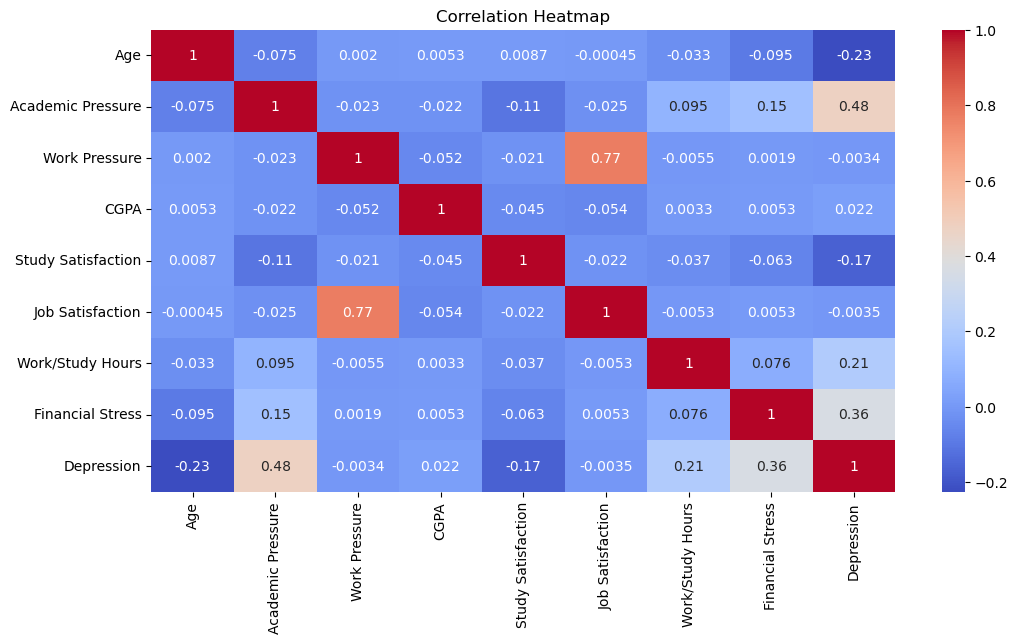

In [76]:
# Visualize correlation
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

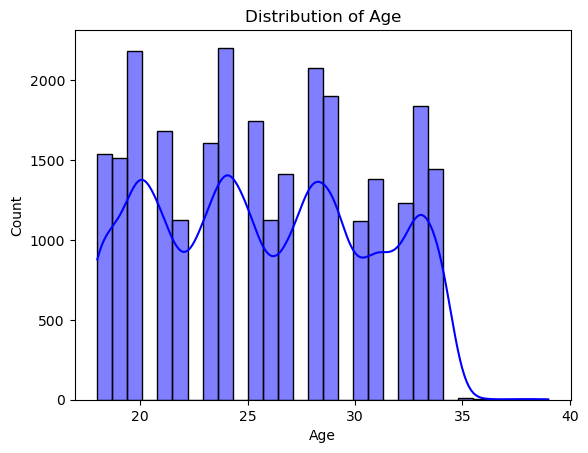

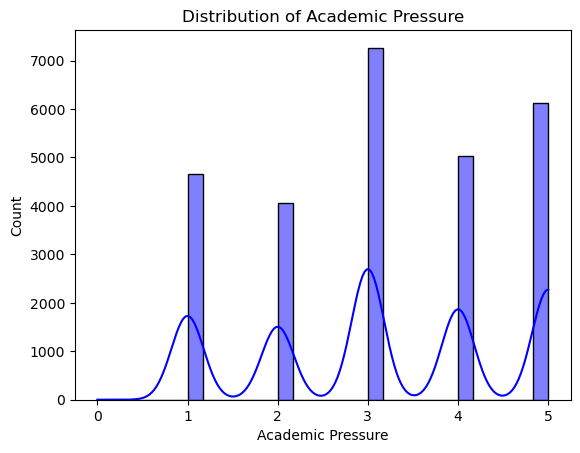

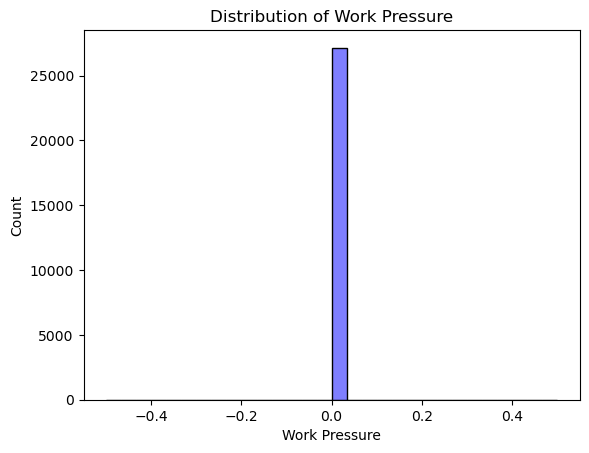

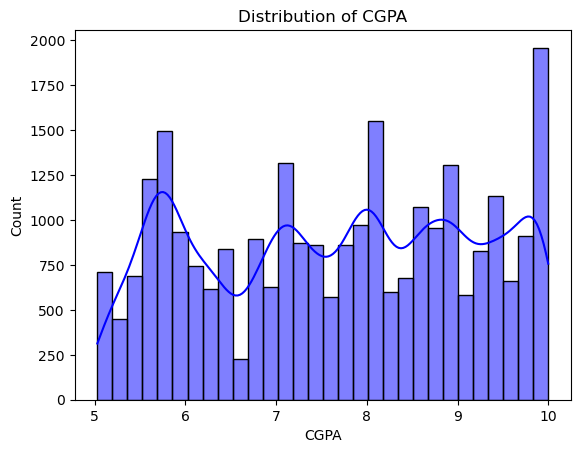

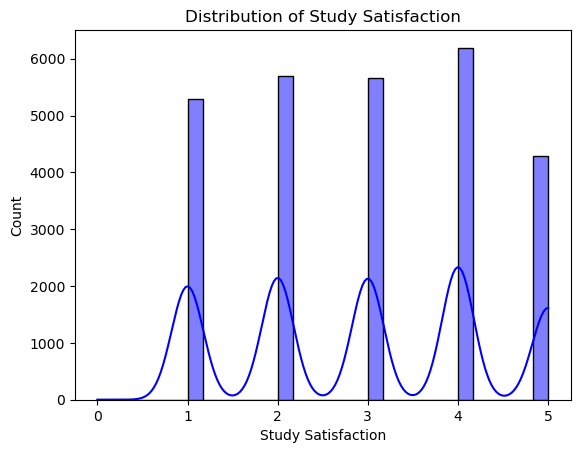

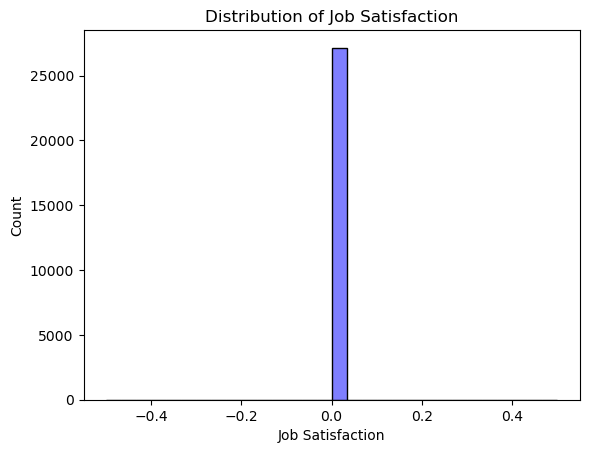

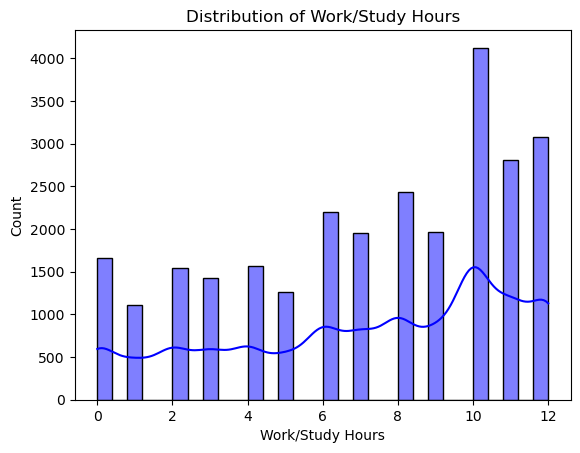

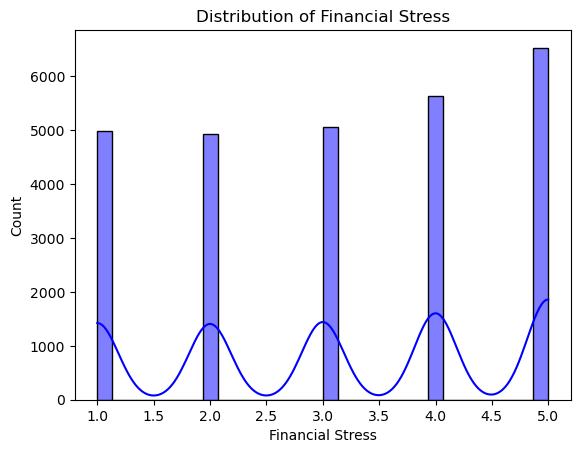

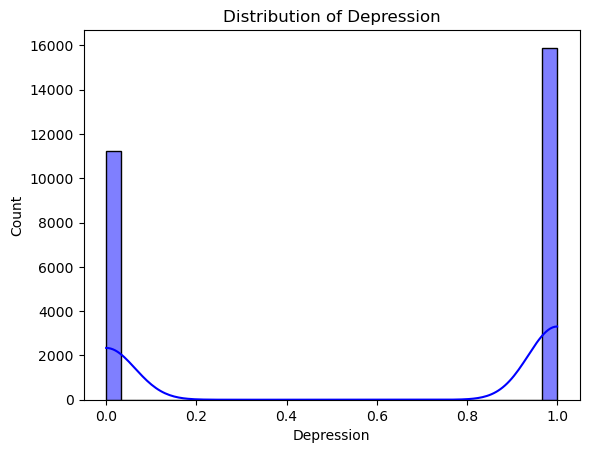

In [77]:
# Plot each numerical column
for column in numerical_columns:
    plt.figure()
    sns.histplot(data_cleaned[column], kde=True,bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()

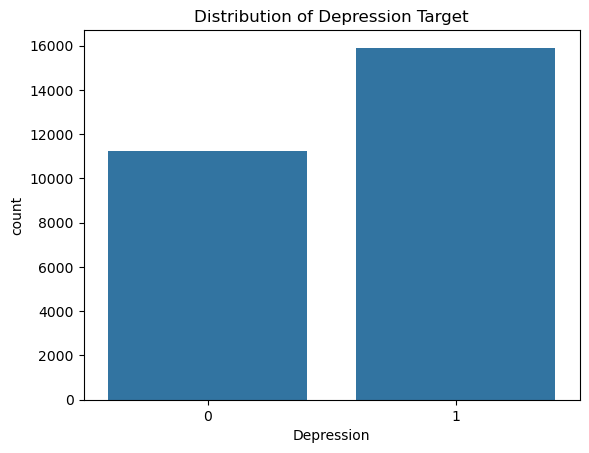

In [78]:
# Distribution of the target variable
sns.countplot(x='Depression', data=data)
plt.title('Distribution of Depression Target')
plt.show()

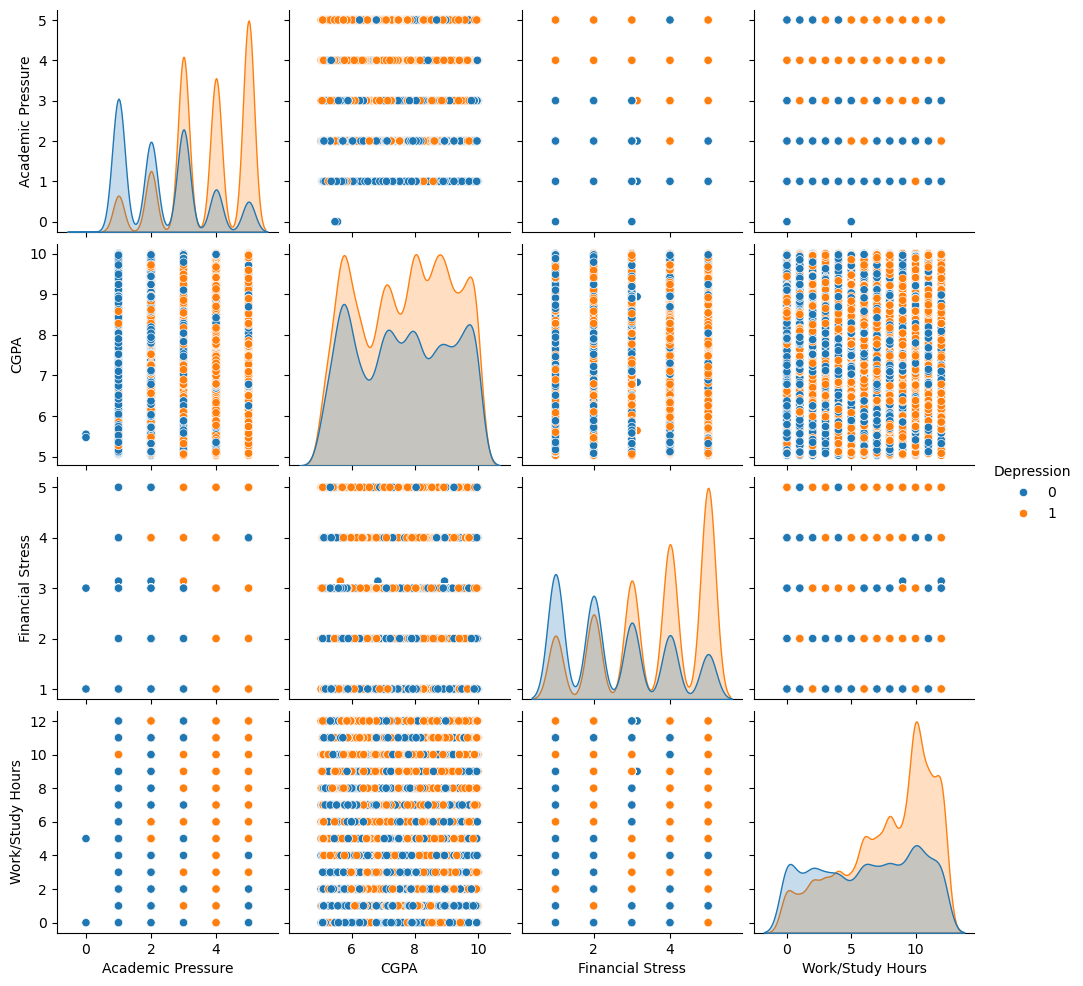

In [79]:
# Pairplot for selected features
sns.pairplot(data_cleaned, vars=['Academic Pressure', 'CGPA', 'Financial Stress', 'Work/Study Hours'], 
             hue='Depression')
#add color to the plots based  on the 'Depression' column.

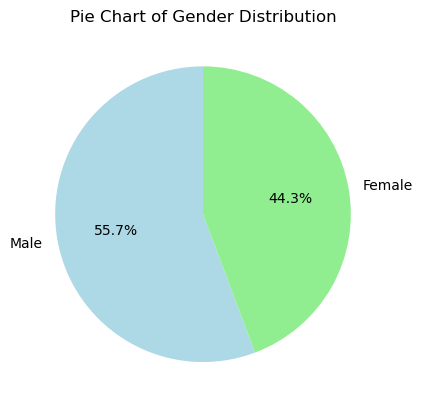

In [80]:
#Pie Diagram for a categorical column
if 'Gender' in data.columns:
    plt.figure()
    data_cleaned['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
    plt.title('Pie Chart of Gender Distribution')
    plt.ylabel('')
    plt.show()

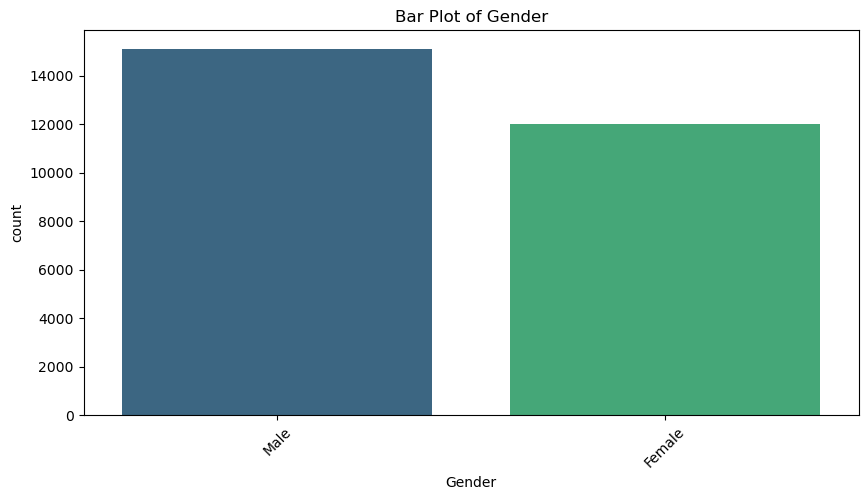

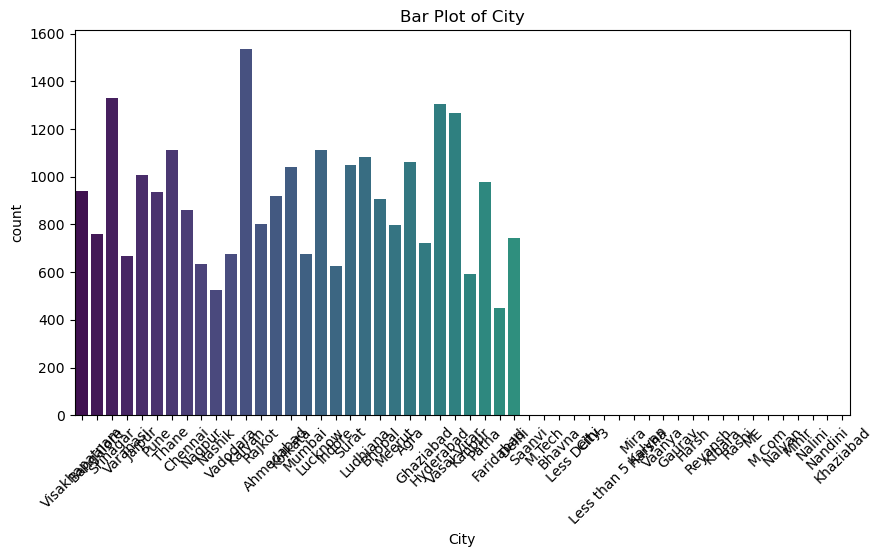

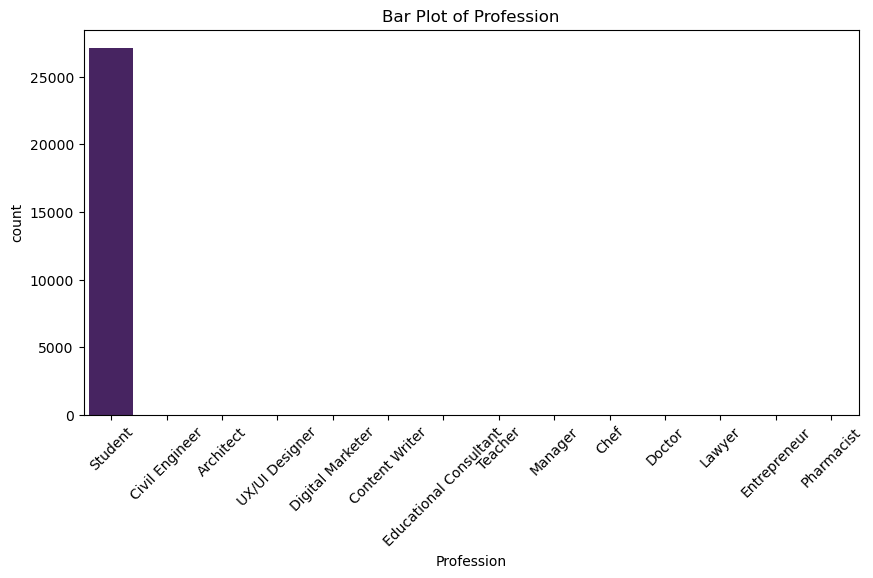

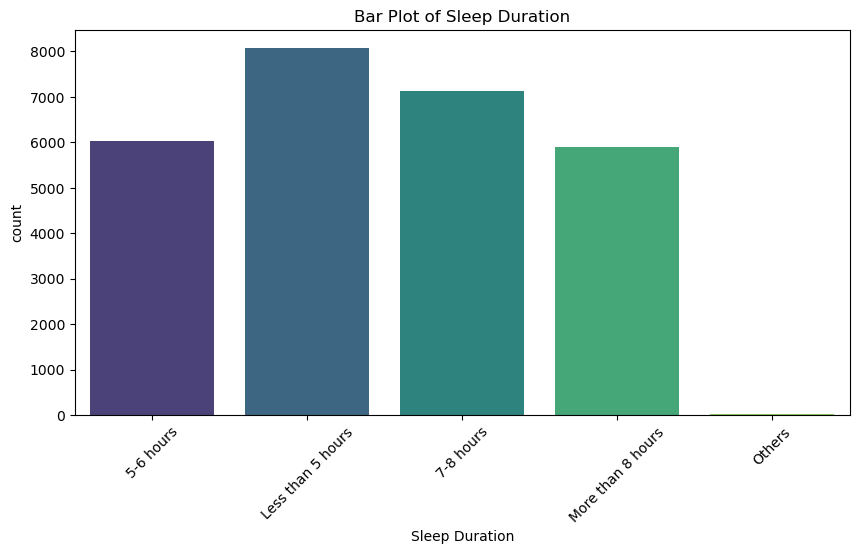

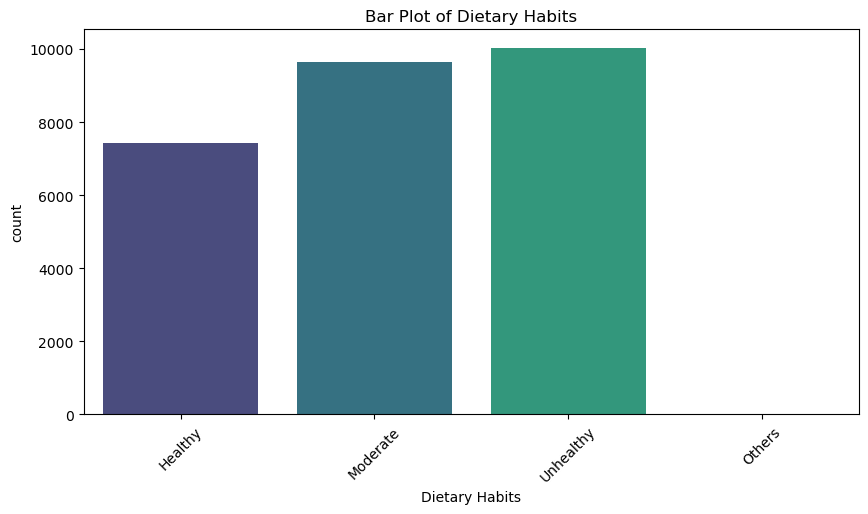

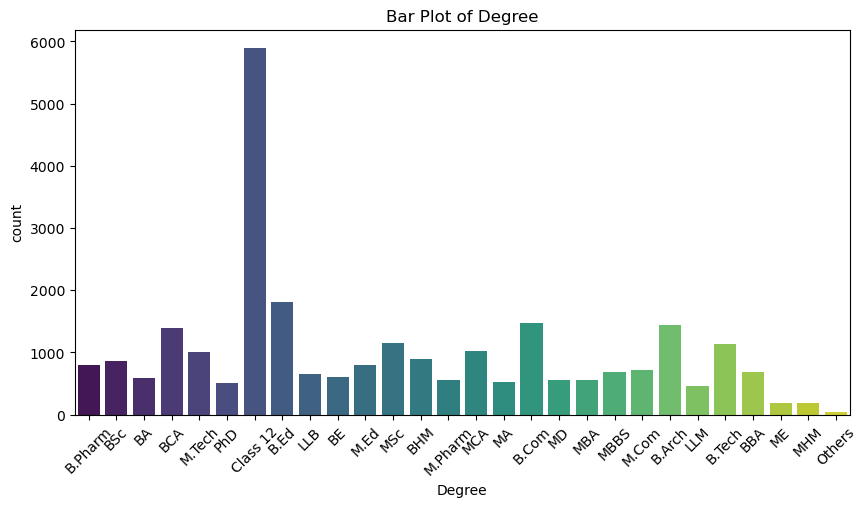

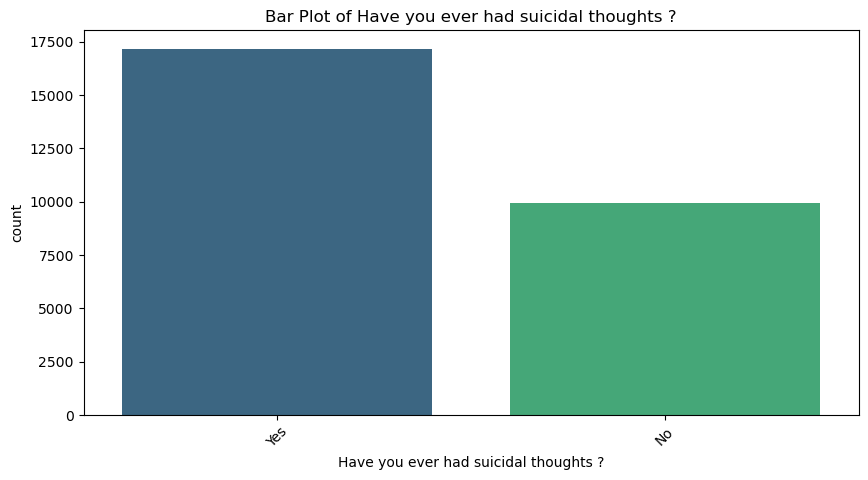

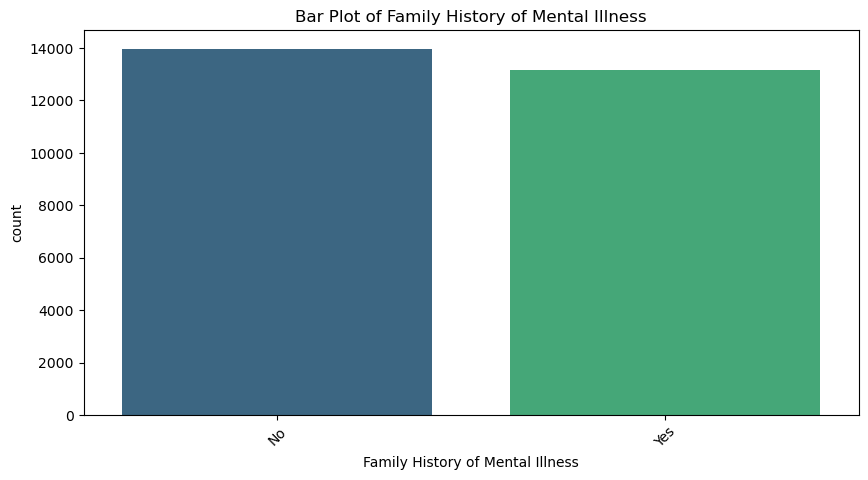

In [81]:
#Bar Plot for categorical column counts
for column in data_cleaned.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data_cleaned[column], palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

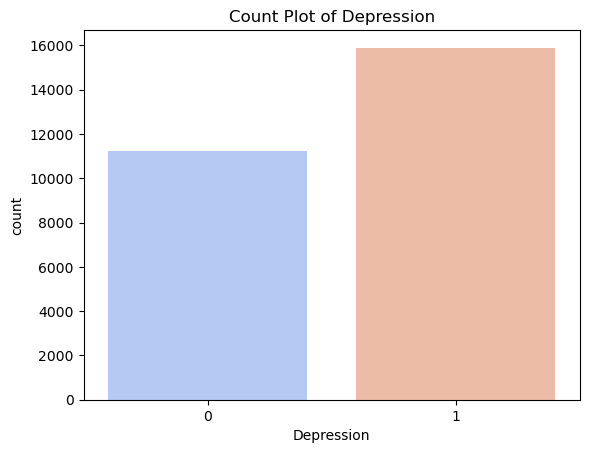

In [82]:
#Count Plot for specific target column
if 'Depression' in data_cleaned.columns:
    plt.figure()
    sns.countplot(x='Depression', data=data_cleaned, palette='coolwarm')
    plt.title('Count Plot of Depression')
    plt.show()

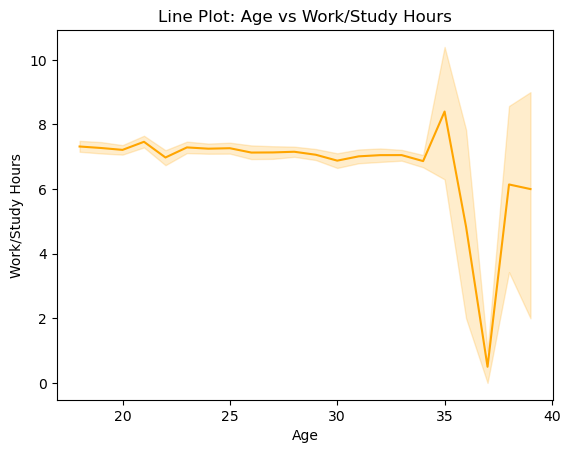

In [83]:
#Line Plot (Example with Age vs Work/Study Hours)
if 'Age' in data_cleaned.columns and 'Work/Study Hours' in data.columns:
    plt.figure()
    sns.lineplot(x='Age', y='Work/Study Hours', data=data_cleaned, color='orange')
    plt.title('Line Plot: Age vs Work/Study Hours')
    plt.show()

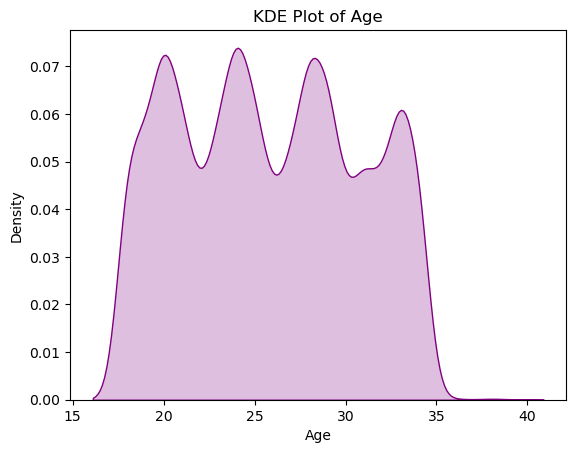

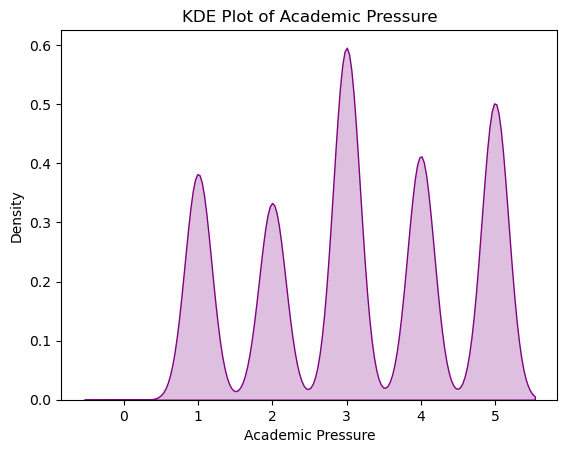

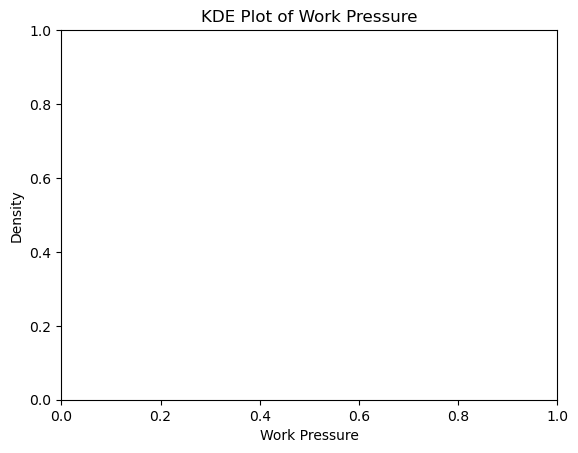

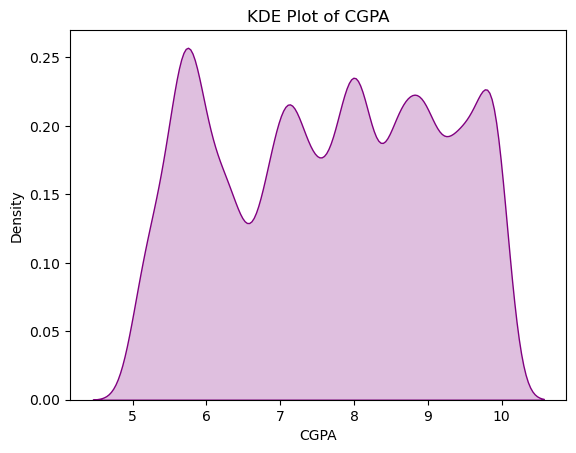

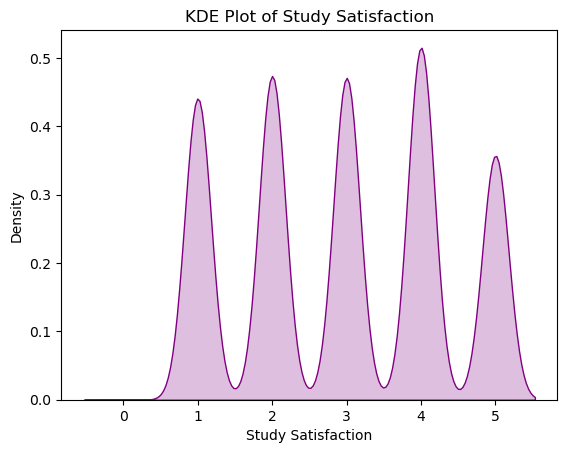

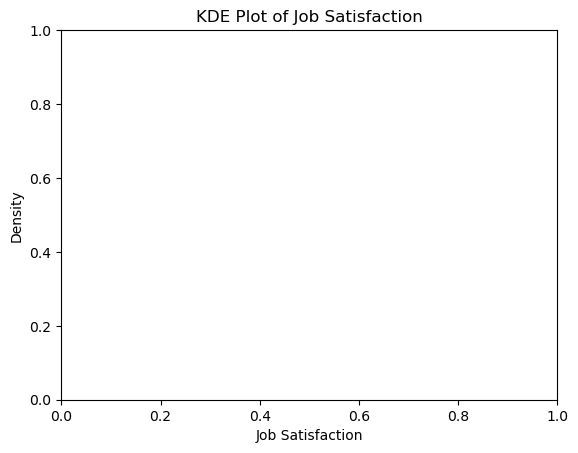

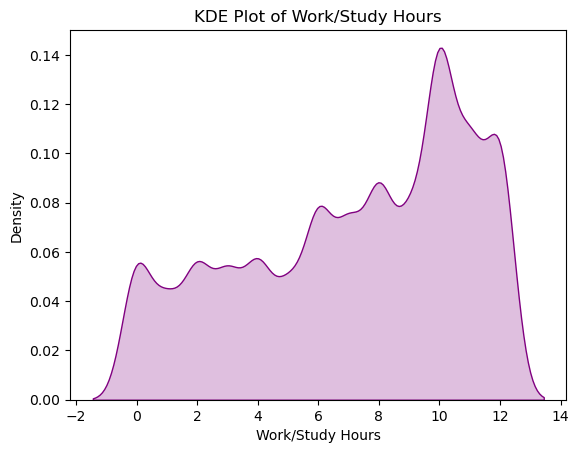

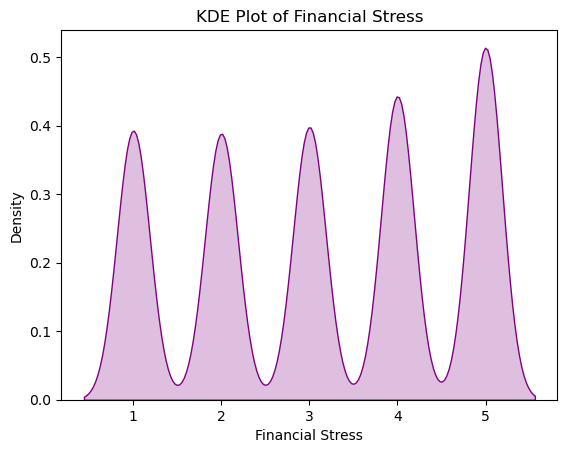

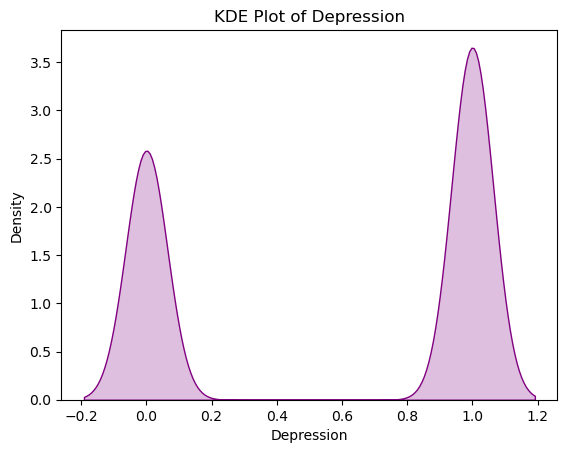

In [84]:
#KDE Plot for numeric columns
for column in numerical_columns.columns:
    plt.figure()
    sns.kdeplot(data_cleaned[column], shade=True, color='purple')
    plt.title(f'KDE Plot of {column}')
    plt.show()

7.Feature Engineering
---

In [85]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

In [86]:
categorical_columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [87]:
# One-Hot Encoding for categorical columns(no ordinal relationship)
data_onehot_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

In [88]:
#An ordinal relationship is a type of data relationship where the order or ranking of the values matters. 
#It implies that the categories can be placed in a meaningful sequence, 
#but the exact differences between the categories are not necessarily uniform or known.

In [89]:
# Label Encoding for categorical columns (if ordinal relationship exists)
label_encoder = LabelEncoder()
for column in categorical_columns:
    # Applying label encoding for each column
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

In [90]:
print("Data after One-Hot Encoding (if applied):\n", data_onehot_encoded.head())
print("\nData after Label Encoding (if applied):\n", data_cleaned.head())

Data after One-Hot Encoding (if applied):
    Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0   33                  5              0  8.97                   2   
1   24                  2              0  5.90                   5   
2   31                  3              0  7.03                   5   
3   28                  3              0  5.59                   2   
4   25                  4              0  8.13                   3   

   Job Satisfaction  Work/Study Hours  Financial Stress  Depression  \
0                 0                 3               1.0           1   
1                 0                 3               2.0           0   
2                 0                 9               1.0           0   
3                 0                 4               5.0           1   
4                 0                 1               1.0           0   

   Gender_Male  ...  Degree_MBBS  Degree_MCA  Degree_MD  Degree_ME  \
0         True  ...        False       

In [91]:
# Ensure target variable is binary
le = LabelEncoder()
data_cleaned['Depression'] = le.fit_transform(data_cleaned['Depression'])
print(data_cleaned['Depression'].unique())  # Check unique values
print(data_cleaned['Depression'].value_counts())  # Count occurrences of each value

[1 0]
Depression
1    15899
0    11246
Name: count, dtype: int64


8.Feature Selection
---

In [92]:
#Random Forest Feature Selection
# Separate features and target
X = data_cleaned.drop(columns=['Depression'])  # Assuming 'Depression' is the target column
y = data_cleaned['Depression']

In [93]:
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33,51,11,5,0,8.97,2,0,0,0,3,1,3,1.0,0
1,0,24,3,11,2,0,5.90,5,0,0,1,10,0,3,2.0,1
2,1,31,44,11,3,0,7.03,5,0,2,0,5,0,9,1.0,1
3,0,28,49,11,3,0,5.59,2,0,1,1,7,1,4,5.0,1
4,0,25,16,11,4,0,8.13,3,0,0,1,17,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27169,0,28,11,11,1,0,7.10,3,0,0,0,9,0,12,3.0,0
27170,0,28,44,11,5,0,8.69,5,0,3,0,11,1,4,4.0,0
27171,1,27,37,11,3,0,5.89,2,0,0,0,16,1,5,2.0,0
27172,1,31,40,11,3,0,9.79,3,0,0,1,15,0,2,2.0,0


In [94]:
y

0        1
1        0
2        0
3        1
4        0
        ..
27169    0
27170    0
27171    0
27172    0
27173    0
Name: Depression, Length: 27145, dtype: int64

In [95]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [96]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
0                                  Gender    0.015752
1                                     Age    0.082469
2                                    City    0.071977
3                              Profession    0.000351
4                       Academic Pressure    0.160214
5                           Work Pressure    0.000000
6                                    CGPA    0.087638
7                      Study Satisfaction    0.042495
8                        Job Satisfaction    0.000000
9                          Sleep Duration    0.032701
10                         Dietary Habits    0.036106
11                                 Degree    0.061869
12  Have you ever had suicidal thoughts ?    0.236152
13                       Work/Study Hours    0.069423
14                       Financial Stress    0.087670
15       Family History of Mental Illness    0.015184


In [97]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X, y)

# Transform data to keep selected features
X_selected = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

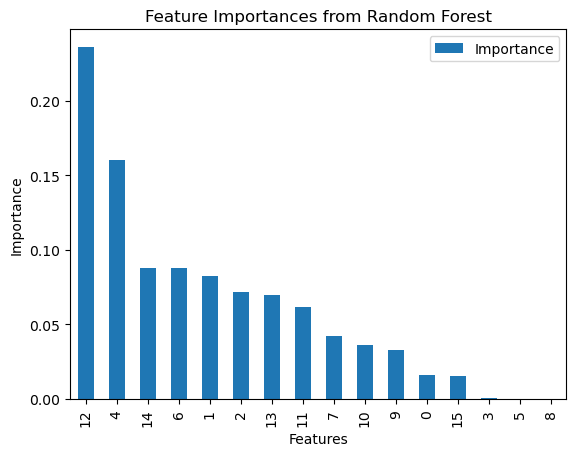

In [98]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [99]:
# Get the most important features
important_features = sorted_importances.head(10)
print("\nTop 10 Important Features from Random Forest:")
print(important_features)


Top 10 Important Features from Random Forest:
                                  Feature  Importance
12  Have you ever had suicidal thoughts ?    0.236152
4                       Academic Pressure    0.160214
14                       Financial Stress    0.087670
6                                    CGPA    0.087638
1                                     Age    0.082469
2                                    City    0.071977
13                       Work/Study Hours    0.069423
11                                 Degree    0.061869
7                      Study Satisfaction    0.042495
10                         Dietary Habits    0.036106


9.Split Data into Training and Testing Sets
----

In [100]:
# Assign X using selected features
top_n_features = feature_importances['Feature']
X_selected = X[top_n_features]

#spilit into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [101]:
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)

Training set shape (X_train): (21716, 16)
Testing set shape (X_test): (5429, 16)
Training labels shape (y_train): (21716,)
Testing labels shape (y_test): (5429,)


10.Feature Scaling
---

In [102]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (21716, 16)
X_test_scaled shape: (5429, 16)


11.Model Building
----

In [103]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "k-NN": KNeighborsClassifier()
}

12.Model Evaluation
----

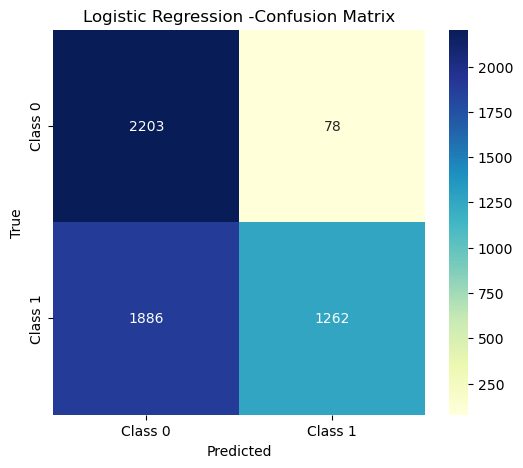

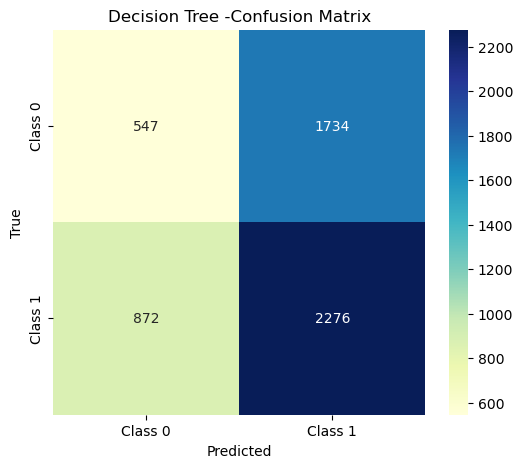

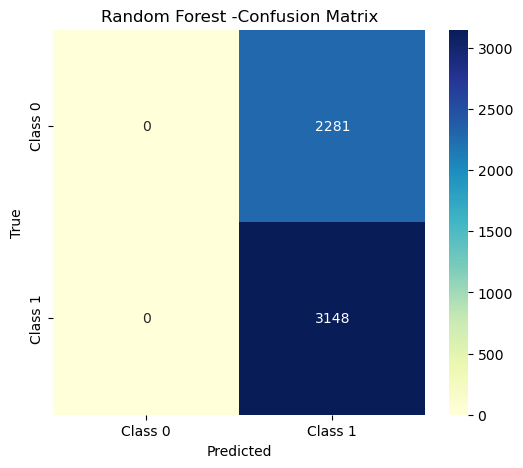

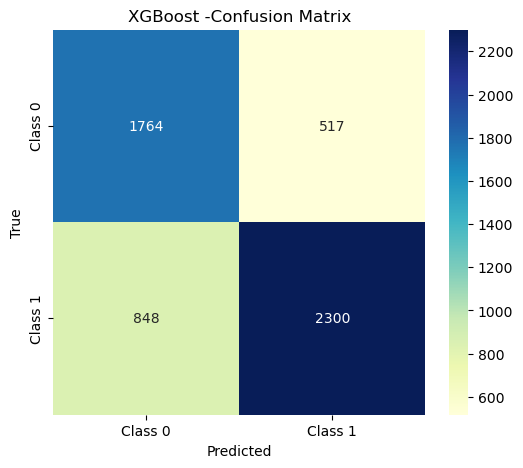

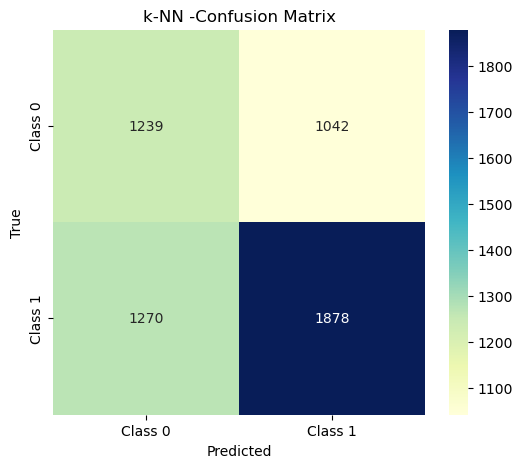

In [104]:
results = {}
# Train, evaluate, and store results for each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) # Accuracy Score 
    cm = confusion_matrix(y_test, y_pred) # Confusion Matrix  
    recall = recall_score(y_test, y_pred) # Recall   
    cr = classification_report(y_test, y_pred) # Classification Report
    
    # Storing results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Recall": recall,
        "Classification Report": cr
    }
    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"{model_name} -Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

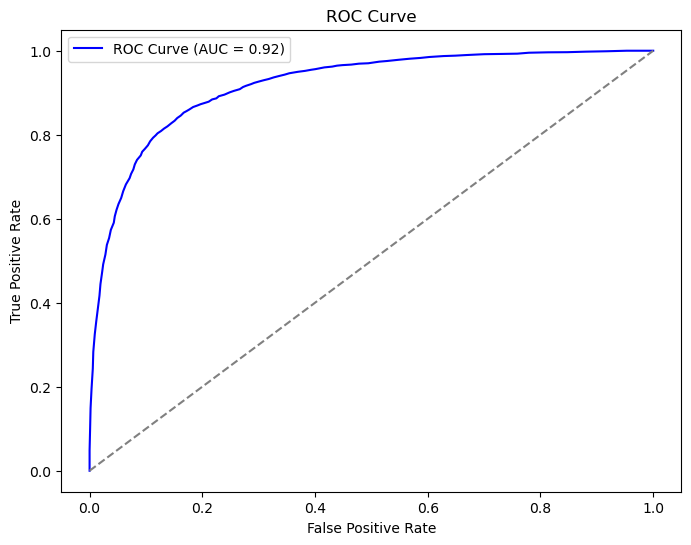

In [105]:
# Plotting ROC Curve for Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [106]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Recall:\n{metrics['Recall']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression:
Accuracy: 0.6382
Confusion Matrix:
[[2203   78]
 [1886 1262]]
Recall:
0.40088945362134687
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.97      0.69      2281
           1       0.94      0.40      0.56      3148

    accuracy                           0.64      5429
   macro avg       0.74      0.68      0.63      5429
weighted avg       0.77      0.64      0.62      5429


Decision Tree:
Accuracy: 0.5200
Confusion Matrix:
[[ 547 1734]
 [ 872 2276]]
Recall:
0.7229987293519695
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.24      0.30      2281
           1       0.57      0.72      0.64      3148

    accuracy                           0.52      5429
   macro avg       0.48      0.48      0.47      5429
weighted avg       0.49      0.52      0.49      5429


Random Forest:
Accuracy: 0.5798
Confusion Matrix:
[[   0 2281]
 [   0 3148]]
Recal

In [107]:
# Results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}")

Model Performance:
Logistic Regression: Accuracy = 0.6382
Decision Tree: Accuracy = 0.5200
Random Forest: Accuracy = 0.5798
XGBoost: Accuracy = 0.7486
k-NN: Accuracy = 0.5741


In [108]:
best_model_name = max(results, key=lambda model: results[model]['Accuracy'])
best_model_accuracy = results[best_model_name]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is XGBoost with an accuracy of 0.7486


13.Hyperparameter Tuning
-----

In [109]:
rf_model = RandomForestClassifier(random_state=42)

In [110]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 200],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'class_weight': [None, 'balanced']
}

In [111]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # Number of cross-validation folds
    verbose=2,  # Print progress
    n_jobs=-1,  # Use all processors
    scoring='accuracy'
)

In [112]:
grid_search.fit(X_train_scaled, y_train)
best_param=grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [113]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (Accuracy): 0.8430189545557543


Evaluate the best model

In [114]:
y_pred = best_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8447
Confusion Matrix:
[[1847  434]
 [ 409 2739]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2281
           1       0.86      0.87      0.87      3148

    accuracy                           0.84      5429
   macro avg       0.84      0.84      0.84      5429
weighted avg       0.84      0.84      0.84      5429



Pipeline
---

In [115]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('classifier', RandomForestClassifier(
        n_estimators=200,                          # Best number of estimators from GridSearchCV
        min_samples_split=10,                       # Best min_samples_split from GridSearchCV
        min_samples_leaf=1,                         # Best min_samples_leaf from GridSearchCV
        max_depth=10,                               # Best max_depth from GridSearchCV
        class_weight=None,                          # Best class_weight from GridSearchCV
        random_state=42))                           # Ensure reproducibility        
     ])
# Train the pipeline
pipeline.fit(X_train, y_train)
# Predict on test data
y_pred = pipeline.predict(X_test)

In [116]:
# Assuming X_train is a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now you can access column names
print(X_train_scaled_df.columns)

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')


In [117]:
X_train.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [118]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=200, random_state=42))])

In [119]:
y_pred=pipeline.predict(X_test)

14.Save the model
---

In [120]:
# Save the fitted pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline.pkl')

['best_model_pipeline.pkl']

15.Test with Unseen Data
---

Load the pipeline

In [121]:
loaded_pipeline = joblib.load('best_model_pipeline.pkl')

In [122]:
#Load unseen dataset
data_unseen = pd.read_csv('unseen_dataset.csv')
data_unseen

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,137001,Male,28,Patna,Student,2,0,5.64,5,0,More than 8 hours,Unhealthy,BSc,No,10,5,No,0
1,137003,Female,29,Visakhapatnam,Student,2,0,5.99,5,0,More than 8 hours,Healthy,BE,Yes,0,1,No,0
2,137005,Male,32,Nashik,Student,4,0,7.09,4,0,7-8 hours,Moderate,LLB,No,12,2,No,0
3,137006,Female,23,Surat,Student,4,0,5.16,2,0,More than 8 hours,Healthy,B.Tech,Yes,10,4,Yes,0
4,137013,Male,36,Varanasi,Student,0,0,8.54,3,0,More than 8 hours,Moderate,Class 12,Yes,8,5,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,140685,Female,27,Surat,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1,Yes,0
723,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3,Yes,0
724,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2,No,0
725,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5,No,1


In [128]:
#split dataset
X_unseen = data_unseen.drop(columns=['id', 'Depression'])
y_unseen = data_unseen['Depression']

In [129]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [130]:
# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [135]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [136]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [137]:
# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [157]:
# Predictions and evaluation on unseen data
y_pred_unseen = pipeline.predict(X_unseen)

unseen_report = classification_report(y_unseen, y_pred_unseen)
unseen_accuracy = accuracy_score(y_unseen, y_pred_unseen)
print("Confusion Matrix:\n", confusion_matrix(y_unseen, y_pred_unseen))
print("Accuracy on Unseen Data:\n", accuracy_score(y_unseen, y_pred_unseen))
print("\n",test_report, test_accuracy, unseen_report, unseen_accuracy)

Confusion Matrix:
 [[213  88]
 [ 90 336]]
Accuracy on Unseen Data:
 0.7551581843191196

               precision    recall  f1-score   support

           0       0.73      0.70      0.72      2281
           1       0.79      0.82      0.80      3148

    accuracy                           0.77      5429
   macro avg       0.76      0.76      0.76      5429
weighted avg       0.77      0.77      0.77      5429
 0.767913059495303               precision    recall  f1-score   support

           0       0.70      0.71      0.71       301
           1       0.79      0.79      0.79       426

    accuracy                           0.76       727
   macro avg       0.75      0.75      0.75       727
weighted avg       0.76      0.76      0.76       727
 0.7551581843191196


In [159]:
#  Print results
print("Predictions for Unseen Data:",y_pred_unseen)
print("\nTrue Labels for Unseen Data:", y_unseen)
print(f"Accuracy on Unseen Data: {test_accuracy:.2f}")

Predictions for Unseen Data: [1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 

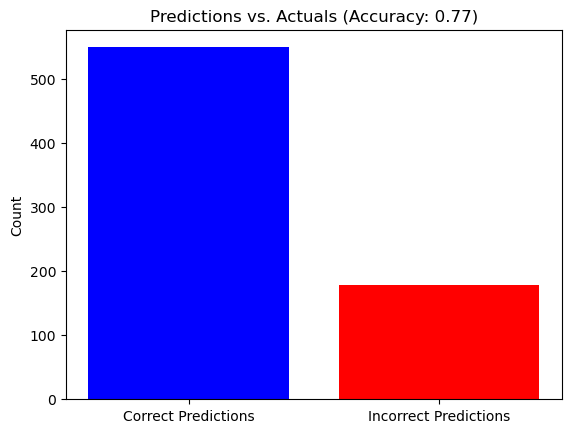

In [160]:
# Count correct predictions
correct = np.sum(np.array(y_pred_unseen) == np.array(y_unseen))
incorrect = len(y_unseen) - correct

# Bar plot
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct, incorrect]

plt.bar(labels, values, color=['blue', 'red'])
plt.title(f"Predictions vs. Actuals (Accuracy: {test_accuracy:.2f})")
plt.ylabel("Count")
plt.show()

16.Conclusion
---

This machine learning project successfully explored the prediction of student depression using a dataset containing various behavioral and psychological indicators. The model was trained and tested on relevant features, providing insights into patterns associated with depression. After evaluating multiple algorithms, the selected model demonstrated satisfactory performance, achieving high accuracy, precision, and recall.

17.Future Works
---

Feature Expansion

Incorporate additional features such as social media activity, screen time, and sleep patterns to improve model performance.
Collect real-time data using wearable devices or mobile applications for continuous monitoring.

Advanced Modeling Techniques

Implement deep learning models like recurrent neural networks (RNNs) or transformers for sequential data analysis.
Explore ensemble methods such as stacking or boosting for higher accuracy.